# PCA 실습

### point!   
### -pca가 선형적 정보를 보존할까?  
### -pca의 결과, 축들이 직교할까? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

### 빌트인 데이터 (5개의 피쳐, 100개의 표본)

In [2]:
data = pd.DataFrame(np.random.normal(size =1000))
data.columns =["f1"]
lr = LinearRegression()

In [3]:
for i in range(2,6) :
    data["f"+str(i)] = i + np.random.normal(size =1000)

In [4]:
data

,f1,f2,f3,f4,f5
0,0.792817,1.846049,2.181939,4.405141,3.246595
1,1.835116,1.587180,2.246674,4.011039,5.343020
2,0.120805,2.148789,2.864648,5.243611,4.817590
3,-0.617787,1.507076,3.202967,7.282863,2.934659
4,0.369490,2.162649,1.687026,4.122167,6.599247
5,-0.436351,1.224509,3.980414,2.547735,4.448377
6,0.750035,2.448912,3.936303,3.913854,4.942712
7,0.684671,1.749018,4.154068,3.964622,3.787736
8,1.245877,3.528241,3.373100,2.767937,5.117686
9,-0.275246,3.521589,3.312052,3.090914,4.570685


In [5]:
data.to_csv("data1.csv")

In [6]:
y_dt = 100 + 1*data["f1"]+2*data["f2"]+3*data["f3"]+4*data["f4"]+5*data["f5"] + np.random.normal(0,5,size=1000)

### 추후 정보량 보존을 보이기 위해 5개의 피쳐로 이뤄진 선형회귀분석 결과물 형성
### $R^2$가 정보량의 지표 = 0.7

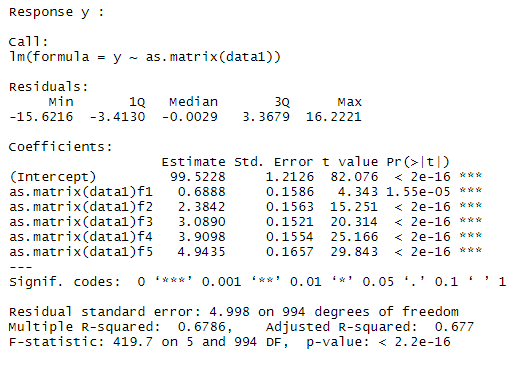

In [7]:
y_dt = pd.DataFrame(y_dt)
y_dt.columns = ["y"]

In [8]:
y_dt.to_csv("y_dt.csv")

In [9]:
data.cov()

,f1,f2,f3,f4,f5
f1,0.943739,-0.016631,-0.050778,-0.030910,-0.012621
f2,-0.016631,0.939676,-0.007705,0.024254,-0.012285
f3,-0.050778,-0.007705,0.966498,-0.044471,-0.039507
f4,-0.030910,0.024254,-0.044471,0.979479,-0.025779
f5,-0.012621,-0.012285,-0.039507,-0.025779,1.008799


In [10]:
data.corr()

,f1,f2,f3,f4,f5
f1,1.000000,-0.017660,-0.053168,-0.032149,-0.012934
f2,-0.017660,1.000000,-0.008086,0.025281,-0.012617
f3,-0.053168,-0.008086,1.000000,-0.045706,-0.040010
f4,-0.032149,0.025281,-0.045706,1.000000,-0.025934
f5,-0.012934,-0.012617,-0.040010,-0.025934,1.000000


In [11]:
pca = PCA()

### 데이터 빌트인 (기존 데이터에 공선성있는 피쳐들 추가)

In [12]:
data["f6"] = data["f1"]+5*data["f2"] + np.random.normal(0,5,1000)
data["f7"] = data["f3"]+7*data["f4"]+3*data["f5"] + np.random.normal(0,1,1000)
data["f8"] = data["f1"]+4*data["f3"] + np.random.normal(0,5,1000)
data["f9"] = data["f2"]+2*data["f4"]+1*data["f5"] + np.random.normal(0,1,1000)
data["f10"] = data["f1"]+2*data["f4"] + np.random.normal(0,5,1000)
data["f11"] = data["f3"]+3*data["f2"]+2*data["f5"] + np.random.normal(0,1,1000)
data["f12"] = data["f1"]+3*data["f5"] + np.random.normal(0,5,1000)
data["f13"] = data["f3"]+1*data["f4"]+6*data["f2"] + np.random.normal(0,1,1000)
data["f14"] = data["f4"]+2*data["f2"] + np.random.normal(0,5,1000)
data["f15"] = data["f3"]+4*data["f1"]+4*data["f5"] + np.random.normal(0,1,1000)
data["f16"] = data["f3"]+1*data["f2"]+5*data["f5"] + np.random.normal(0,1,1000)
data["f17"] = data["f1"]+2*data["f5"] + 4*np.random.normal(0,5,1000)
data["f18"] = data["f3"]+3*data["f4"]+3*data["f2"] + np.random.normal(0,1,1000)
data["f19"] = data["f4"]+4*data["f2"] + 2*np.random.normal(0,5,1000)
data["f20"] = data["f3"]+5*data["f1"]+1*data["f5"] + np.random.normal(0,1,1000)

In [13]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
0,0.792817,1.846049,2.181939,4.405141,3.246595,14.306713,42.938150,16.716726,12.606692,10.096329,13.753204,10.236385,15.413684,8.072212,17.222761,21.786389,13.437244,22.161088,23.648150,8.397047
1,1.835116,1.587180,2.246674,4.011039,5.343020,19.476979,45.592169,9.018760,14.146809,8.679967,17.051077,17.285221,15.932007,10.995463,30.139706,31.807549,-8.669394,18.285280,5.846229,15.208523
2,0.120805,2.148789,2.864648,5.243611,4.817590,21.869490,54.197828,14.255974,19.346899,10.917084,18.685342,10.708578,21.289892,6.560115,23.613654,29.824817,29.356408,23.626817,12.681143,7.680334
3,-0.617787,1.507076,3.202967,7.282863,2.934659,5.123603,63.995268,9.868385,19.085881,14.636639,13.381671,10.538911,19.287517,14.334191,13.146425,20.375357,18.905097,27.109351,27.462564,2.655922
4,0.369490,2.162649,1.687026,4.122167,6.599247,5.591153,50.707984,7.977923,17.232542,9.166765,20.201366,11.319822,19.194565,11.429955,30.827043,37.351631,11.508237,19.407753,26.797712,11.504599
5,-0.436351,1.224509,3.980414,2.547735,4.448377,-0.348526,34.911288,15.795225,11.877108,4.537911,16.397950,8.263850,14.054009,6.176617,19.886419,26.000996,30.140554,13.998796,2.221043,5.317309
6,0.750035,2.448912,3.936303,3.913854,4.942712,12.082305,46.569378,5.595789,15.993574,5.933268,20.281210,13.250560,21.508094,7.530677,26.240788,31.048114,32.642321,23.441266,38.155050,14.059552
7,0.684671,1.749018,4.154068,3.964622,3.787736,2.658814,42.531538,18.896249,13.615680,12.131903,16.694977,19.166769,20.277836,8.994229,22.393371,24.172230,7.667015,21.823154,0.007330,10.988075
8,1.245877,3.528241,3.373100,2.767937,5.117686,17.014934,38.298408,21.810635,13.460042,7.300469,23.794280,17.372280,27.160996,8.604492,29.239503,33.869985,36.403033,22.786836,24.900180,13.809213
9,-0.275246,3.521589,3.312052,3.090914,4.570685,12.890305,38.850777,20.222085,15.722747,0.849102,22.525627,13.002575,27.397592,22.720478,20.807344,30.842778,20.629573,24.533321,9.865973,6.273614


In [14]:
data.to_csv("data2.csv")

## 공선성 있는 데이터의 공분산행렬과 상관계수 행렬

In [15]:
data.cov()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
f1,0.943739,-0.016631,-0.050778,-0.030910,-0.012621,0.606243,-0.333146,0.447184,-0.127096,1.084084,-0.046715,1.019574,-0.190754,0.000668,3.691119,-0.094030,0.511749,-0.160944,0.163338,4.615204
f2,-0.016631,0.939676,-0.007705,0.024254,-0.012285,4.398208,0.108998,-0.182502,0.980998,0.243583,2.731237,-0.037932,5.664621,1.941220,-0.173534,0.879820,0.034548,2.921663,3.721688,-0.089831
f3,-0.050778,-0.007705,0.966498,-0.044471,-0.039507,-0.251414,0.531787,4.300929,-0.121649,-0.401409,0.812713,0.156443,0.839187,-0.008510,0.554029,0.804112,-0.457108,0.797961,-0.255956,0.701553
f4,-0.030910,0.024254,-0.044471,0.979479,-0.025779,-0.050723,6.764901,-0.125526,1.942952,1.806033,-0.015467,-0.141302,1.094764,1.410975,-0.234797,-0.170488,0.391557,2.982847,1.108509,-0.204897
f5,-0.012621,-0.012285,-0.039507,-0.025779,1.008799,-0.173788,2.784274,-0.284610,0.920753,-0.156762,2.016364,3.195967,-0.155213,-0.409622,3.983937,5.061787,1.291780,-0.157110,-0.318909,0.859932
f6,0.606243,4.398208,-0.251414,-0.050723,-0.173788,44.703068,-1.257261,-0.662147,4.080499,1.889672,12.431153,-0.448933,26.123562,9.029488,1.324897,3.337452,5.113342,12.979784,19.419557,2.413230
f7,-0.333146,0.108998,0.531787,6.764901,2.784274,-1.257261,57.338247,2.427030,16.280400,12.023153,6.640706,8.830197,7.953891,8.557369,10.614801,14.653358,5.131864,21.217629,6.602329,1.734915
f8,0.447184,-0.182502,4.300929,-0.125526,-0.284610,-0.662147,2.427030,45.390117,-0.594183,-2.062040,3.038021,0.098070,2.884004,0.390743,5.290414,2.864724,-4.106243,3.339166,-3.572992,6.242148
f9,-0.127096,0.980998,-0.121649,1.942952,0.920753,4.080499,16.280400,-0.594183,6.769582,3.737086,4.726415,2.811956,7.768894,4.259349,3.093370,5.507496,2.160480,8.730714,5.523988,0.121380
f10,1.084084,0.243583,-0.401409,1.806033,-0.156762,1.889672,12.023153,-2.062040,3.737086,31.492400,0.283879,-0.081541,3.068737,2.841075,3.462340,-1.108404,-4.132166,5.835966,3.662301,4.947712


In [16]:
data.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
f1,1.000000,-0.017660,-0.053168,-0.032149,-0.012934,0.093337,-0.045288,0.068325,-0.050283,0.198854,-0.012877,0.173758,-0.032317,0.000122,0.668118,-0.018156,0.026525,-0.037393,0.015879,0.942955
f2,-0.017660,1.000000,-0.008086,0.025281,-0.012617,0.678606,0.014849,-0.027945,0.388954,0.044777,0.754466,-0.006478,0.961754,0.355021,-0.031479,0.170246,0.001795,0.680266,0.362597,-0.018393
f3,-0.053168,-0.008086,1.000000,-0.045706,-0.040010,-0.038249,0.071436,0.649353,-0.047558,-0.072759,0.221363,0.026346,0.140488,-0.001535,0.099095,0.153422,-0.023412,0.183197,-0.024589,0.141640
f4,-0.032149,0.025281,-0.045706,1.000000,-0.025934,-0.007665,0.902696,-0.018826,0.754542,0.325181,-0.004185,-0.023638,0.182056,0.252749,-0.041717,-0.032312,0.019921,0.680254,0.105783,-0.041093
f5,-0.012934,-0.012617,-0.040010,-0.025934,1.000000,-0.025879,0.366090,-0.042060,0.352338,-0.027812,0.537571,0.526807,-0.025434,-0.072302,0.697479,0.945311,0.064760,-0.035305,-0.029987,0.169937
f6,0.093337,0.678606,-0.038249,-0.007665,-0.025879,1.000000,-0.024833,-0.014700,0.234565,0.050363,0.497866,-0.011116,0.643052,0.239421,0.034845,0.093631,0.038508,0.438164,0.274311,0.071640
f7,-0.045288,0.014849,0.071436,0.902696,0.366090,-0.024833,1.000000,0.047574,0.826346,0.282939,0.234834,0.193063,0.172878,0.200348,0.246496,0.362985,0.034125,0.632430,0.082347,0.045476
f8,0.068325,-0.027945,0.649353,-0.018826,-0.042060,-0.014700,0.047574,1.000000,-0.033897,-0.054540,0.120748,0.002410,0.070453,0.010282,0.138080,0.079758,-0.030689,0.111865,-0.050087,0.183899
f9,-0.050283,0.388954,-0.047558,0.754542,0.352338,0.234565,0.826346,-0.033897,1.000000,0.255947,0.486430,0.178928,0.491429,0.290222,0.209060,0.397051,0.041811,0.757368,0.200514,0.009260
f10,0.198854,0.044777,-0.072759,0.325181,-0.027812,0.050363,0.282939,-0.054540,0.255947,1.000000,0.013546,-0.002406,0.089999,0.089753,0.108490,-0.037048,-0.037076,0.234719,0.061635,0.174996


In [17]:
np.max(data.corr()[data.corr()!=1])

f1     0.942955
f2     0.961754
f3     0.649353
f4     0.902696
f5     0.945311
f6     0.678606
f7     0.902696
f8     0.649353
f9     0.826346
f10    0.325181
f11    0.754466
f12    0.526807
f13    0.961754
f14    0.399303
f15    0.793657
f16    0.945311
f17    0.064760
f18    0.792607
f19    0.362597
f20    0.942955
dtype: float64

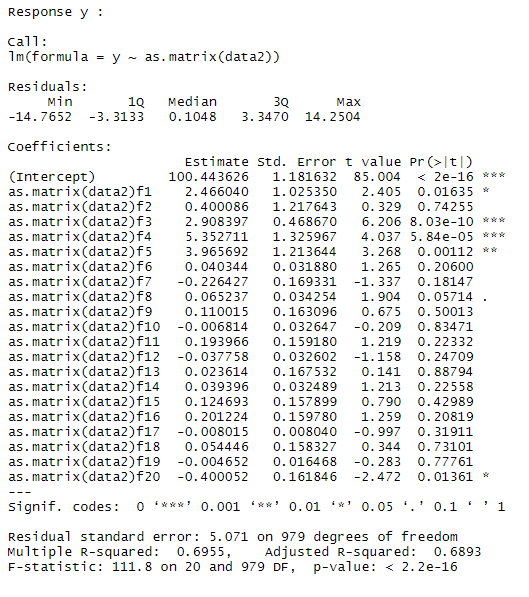

## PCA 시행 후의 데이터의 상관계수 행렬

In [18]:
data_pca = pd.DataFrame(pca.fit_transform(data))
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.323312,-4.694465,-14.660107,1.656420,1.698090,-8.037031,5.738899,-1.278850,-0.878968,-5.543345,-2.978168,-1.110604,1.258135,0.718568,-0.765552,-1.634743,-0.388813,0.230705,0.021800,0.057736
1,18.109198,1.775873,7.022545,1.701001,-7.173448,6.179446,7.372941,3.169731,3.341523,-5.689000,-5.635378,0.001438,-0.651814,1.124136,-0.533897,-0.186933,-0.371682,-0.017962,0.120156,0.108474
2,-19.796309,-7.123677,1.914430,-8.037410,-0.454827,-1.631631,3.428075,-6.514197,4.451989,-4.262695,-5.807951,2.167741,-0.532319,-0.228088,-0.449080,0.816766,-0.216190,-0.011301,-0.095937,-0.041962
3,-9.053509,-13.779637,-8.864697,-8.689538,24.315911,-6.499449,2.218436,1.859916,-2.093008,-5.141391,0.531459,0.154426,-1.713242,-0.066353,0.138020,0.735729,-0.458964,0.052780,-0.199818,-0.007292
4,-2.318304,-12.318675,0.890194,9.956298,7.109843,0.681098,1.963570,5.585522,7.166415,6.780407,-1.504579,1.908145,-1.339451,0.879464,-0.465336,-0.342662,0.191063,0.015913,-0.193069,-0.021553
5,-19.311974,20.460728,-8.964480,1.062316,-2.099876,-6.461382,-0.851188,2.646042,0.703749,5.959392,2.127034,1.092582,-0.366803,-0.697327,0.644095,1.087992,0.017062,0.083510,0.064920,0.077686
6,-23.570457,-20.601511,-10.363205,12.821857,3.955970,1.670038,2.433449,1.836185,6.446553,-0.485437,2.671003,-1.343772,0.371156,-0.283857,-1.451587,0.913435,0.199901,0.148350,-0.077383,0.013432
7,2.685289,11.686165,4.110091,-3.140730,-2.063471,-6.656432,4.676177,1.924572,-7.584156,-0.372794,7.316150,0.261526,0.177916,0.832734,0.367455,0.589189,0.023417,-0.159150,0.114599,-0.013812
8,-27.074053,-14.110952,-2.127972,8.029210,-14.206588,-7.301666,2.094096,-0.019557,-1.053212,2.712808,1.637506,0.174594,0.220919,1.204773,0.194553,-0.696824,-0.267845,0.112963,-0.002367,-0.052550
9,-10.733582,-3.531151,-3.401650,-9.440283,-12.588633,-6.430897,-5.057872,12.534109,-2.159133,3.258374,1.250008,1.162604,1.407578,0.458560,-1.068322,-0.327655,-0.082785,0.107950,-0.003041,-0.129864


In [19]:
data_pca.to_csv("data_pca.csv")

In [20]:
np.mean(data_pca).round(3)

0     0.0
1    -0.0
2     0.0
3     0.0
4    -0.0
5     0.0
6    -0.0
7     0.0
8     0.0
9     0.0
10   -0.0
11   -0.0
12   -0.0
13    0.0
14   -0.0
15   -0.0
16   -0.0
17   -0.0
18    0.0
19    0.0
dtype: float64

In [21]:
data_pca.corr().round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
1,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
2,0.0,-0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
3,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
4,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
5,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,-0.0,0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
7,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
8,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
9,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0


In [22]:
data_pca.cov().round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,395.224,-0.000,0.000,0.000,-0.00,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000
1,-0.000,146.496,-0.000,0.000,0.00,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000
2,0.000,-0.000,96.661,0.000,0.00,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000
3,0.000,0.000,0.000,65.865,0.00,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000
4,-0.000,0.000,0.000,0.000,57.25,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
5,-0.000,-0.000,-0.000,-0.000,0.00,45.298,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000
6,-0.000,0.000,0.000,-0.000,0.00,-0.000,34.885,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000
7,0.000,0.000,-0.000,-0.000,0.00,0.000,-0.000,24.973,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000
8,-0.000,0.000,-0.000,-0.000,0.00,0.000,0.000,-0.000,20.379,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
9,-0.000,-0.000,-0.000,0.000,-0.00,-0.000,0.000,-0.000,0.000,16.653,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000


## Pca 시행후의 데이터를 이용한 선형 정보비교

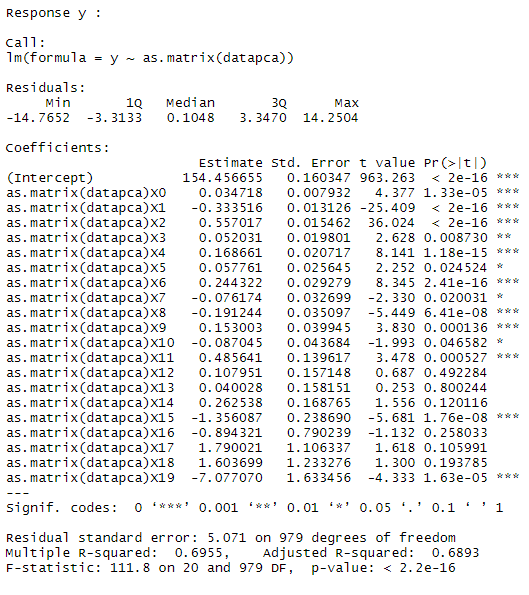

## SKlearn 에서 제공하는 pca 분석결과물들
Attributes
----------
### - 아이젠 벡터 
components_ : array, shape (n_components, n_features)
    Principal axes in feature space, representing the directions of
    maximum variance in the data. The components are sorted by
    ``explained_variance_``.
### - 아이젠 밸류  
explained_variance_ : array, shape (n_components,)
    The amount of variance explained by each of the selected components.

    Equal to n_components largest eigenvalues
    of the covariance matrix of X.

    .. versionadded:: 0.18
### - 축의 비중 ( $\lambda_k/\sum \lambda_i)$
explained_variance_ratio_ : array, shape (n_components,)
    Percentage of variance explained by each of the selected components.

    If ``n_components`` is not set then all components are stored and the
    sum of the ratios is equal to 1.0.

In [23]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### 아이젠 벡터

In [24]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.001654,-0.000697,0.001133,-0.001379,-0.004081,-0.016912,-0.018191,0.010921,-0.007639,0.009853,-0.008370,-0.019730,-0.006292,-0.004452,-0.022067,-0.017932,-0.998641,-0.004244,-0.018001,-0.011497
1,-0.004826,-0.055049,-0.005125,-0.028970,-0.012725,-0.313292,-0.247671,-0.013388,-0.125546,-0.090272,-0.196016,-0.060694,-0.365175,-0.173156,-0.075639,-0.125217,0.034241,-0.263181,-0.716344,-0.043684
2,0.030078,-0.005938,0.020790,0.033113,0.069505,-0.046512,0.464718,0.161753,0.128809,0.110664,0.151190,0.347582,0.017717,0.015544,0.427132,0.373757,-0.026058,0.102601,-0.429910,0.239125
3,0.042993,-0.043498,-0.001901,-0.053337,0.041802,-0.250155,-0.254406,-0.001903,-0.112852,-0.102718,-0.039929,0.319762,-0.327159,-0.305517,0.347164,0.171736,-0.015176,-0.294506,0.484272,0.255653
4,-0.031314,-0.058112,-0.028053,0.085491,-0.000678,-0.504671,0.584754,-0.274323,0.113541,0.230490,-0.203761,-0.064683,-0.294582,-0.019784,-0.153916,-0.097576,0.004293,0.054556,0.216975,-0.183000
5,-0.004381,0.025804,-0.085468,-0.017812,0.038761,0.228972,-0.094021,-0.904407,0.027029,0.020329,0.075973,0.231742,0.056410,-0.015836,0.045810,0.137856,-0.017886,-0.062576,-0.126988,-0.073849
6,0.109461,-0.009218,-0.021910,0.008788,-0.051178,0.141941,-0.115040,-0.085728,-0.047522,0.692587,-0.146201,-0.229256,-0.065199,0.093741,0.219110,-0.299281,0.007106,-0.019616,-0.021901,0.486443
7,0.034337,-0.008698,-0.010524,-0.008963,-0.001506,-0.256146,-0.086611,-0.089881,-0.035978,-0.278801,-0.038136,0.027881,-0.074372,0.883438,0.125269,-0.034534,-0.005528,-0.070772,0.026872,0.165722
8,0.048611,-0.010511,-0.011799,0.020955,0.023733,0.077245,0.205516,-0.184196,0.049559,-0.450269,0.004460,-0.711699,-0.059814,-0.184337,0.283437,0.112908,-0.008422,0.026910,0.003875,0.266584
9,-0.066568,0.041196,0.020785,-0.074224,0.080601,-0.409956,-0.276234,-0.015929,-0.022028,0.364569,0.320245,-0.371849,0.209472,0.058909,0.072687,0.497270,0.010955,-0.083860,0.005673,-0.235571


#### 아이젠 밸류

In [25]:
pca.explained_variance_

array([3.95224460e+02, 1.46496134e+02, 9.66612842e+01, 6.58649544e+01,
       5.72500482e+01, 4.52975617e+01, 3.48853234e+01, 2.49728502e+01,
       2.03785833e+01, 1.66528104e+01, 1.36280551e+01, 1.36074992e+00,
       9.96681505e-01, 9.91963656e-01, 8.66505539e-01, 3.94944276e-01,
       4.13479575e-02, 2.10595868e-02, 1.67639077e-02, 8.93514690e-03])

#### 축의 비중 ($\lambda_k / \sum \lambda_i $)

In [26]:
pca.explained_variance_ratio_

array([4.28654813e-01, 1.58887618e-01, 1.04837450e-01, 7.14361903e-02,
       6.20925859e-02, 4.91290895e-02, 3.78361243e-02, 2.70851973e-02,
       2.21023209e-02, 1.80614006e-02, 1.47807942e-02, 1.47584996e-03,
       1.08098655e-03, 1.07586964e-03, 9.39799551e-04, 4.28350930e-04,
       4.48454050e-05, 2.28409275e-05, 1.81818952e-05, 9.69093291e-06])

#### 정보량 보존 정도

In [27]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

# Dimension Reduction Via PCA

In [28]:
pca2 = PCA(n_components=3)

In [29]:
pca2.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
data_reduced = pd.DataFrame(pca2.fit_transform(data))

In [31]:
data_reduced.head()

,0,1,2
0,-3.323312,-4.694465,-14.660107
1,18.109198,1.775873,7.022545
2,-19.796309,-7.123677,1.914430
3,-9.053509,-13.779637,-8.864697
4,-2.318304,-12.318675,0.890194


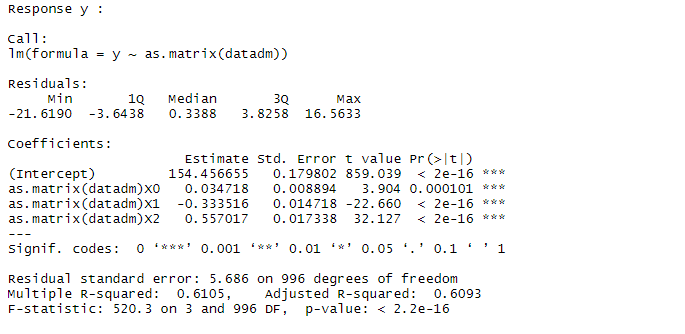

#### 정보량의 보존 정도

In [32]:
sum(pca2.explained_variance_ratio_)

0.6923798813582291

Elbow Rule 확인

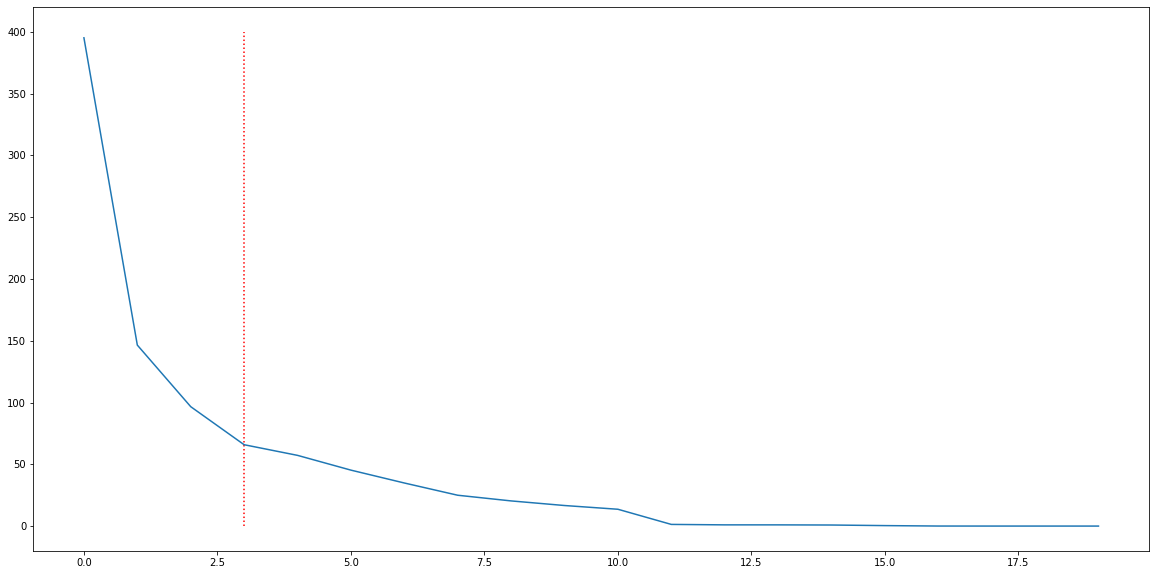

In [62]:
fig = plt.figure(figsize=(20,10))
plt.plot([i for i in range(len(pca.explained_variance_))],pca.explained_variance_)
plt.vlines(x=3,ymin=0,ymax=400,color="red",linestyles=":")
plt.show()
